In [6]:
# Import things
%matplotlib inline
import matplotlib
#matplotlib.use('Agg')

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from matplotlib import rcParams
import os
import glob
from scipy import io

from utils import * 

# Supress warnings for sake of log file
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Set up plots
# Plotting preferences

rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams.update({'font.size': 14}) 
rcParams['axes.titlepad'] = 14 
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
myFmt = md.DateFormatter('%H')
rule = md.HourLocator(interval=1)

In [14]:
# What data do you want to get?
dname = 'SKYOPC'

# Where are the raw .tar files?
dloc = '/Users/heather/ICECAPS-ACE/Data/ACE_compressed/'

# Where do you want to store the extracted .tar files? 
extract_out = '/Users/heather/ICECAPS-ACE/temp_data/'

# Extract all tar files. 
extract_tar(dloc,extract_out,dname)

In [15]:
# Function to read SKYOPC data
# Get SKYOPC Data
# Measurement interval 6 seconds
# I think C0 = time
# C1 = time + 6 s
# C2 = time + 12 s
# ect.

# 32 channels 
# data output in the unit particle/100ml

# SKYOPC chaneel boundaries:
#0.25,0.28,0.3,0.35,0.4,0.45,0.5,0.58,0.65,0.7,0.8,1.0,1.3,1.6,2,2.5,3,3.5,4,5,6.5,7.5,8.5,10,12.5,15,17.5,20,25,30,32 
#channels 16 and 17 are identical (overlapping 
#channel for different physical measurement ranges)...so one should be 
#discarded before analysis.

# Function to read and import GRIMM OPC data
def get_skyopc(d_loc,d1,d2):
    os.chdir(d_loc+'Data/')                  # Change directory to where the data is
    #log = open(log_licor,'w')             # Open the log file for writing
    all_files = glob.glob('*SKYOPC*')
    file_dates = np.asarray([(dt.datetime.strptime(f[-14:-4], '%Y-%m-%d')).date() for f in all_files])
    idxs = np.where(np.logical_and(file_dates>=d1.date(), file_dates<=d2.date()))[0]
    dfs = [all_files[i] for i in idxs]
    skyopc = pd.DataFrame()
    # Extract the data
    for f in dfs: 
        # Ignore file if it's empty
        if os.path.getsize(f)==0:
            print('Error with: '+f+' this file is empty.')
            #log.write('Error with: '+f+' this file is empty.\n')
            continue 
        print('Opening '+f+'')
        f_data = open(f)
        d = f_data.readlines()
        f_data.close()
        for i in range(0,len(d)):
            line=d[i].split()
            if line[0] =='P':
                if len(line)!=17:
                    c=0
                    datetime=np.nan
                    continue
                #Year Mon Day Hr Min Loc 4Tmp Err pA/p pR/p UeL Ue4 Ue3 Ue2 Ue1 Iv 
                datetime = dt.datetime(int(line[1])+2000,int(line[2]),int(line[3]),int(line[4]),int(line[5]))
                #datetime = dt.datetime.strptime('20'+line[1]+line[2]+line[3]+line[4]+line[5],'%Y%m%d%H%M')
                quad_Tmp = int(line[7])
                Err = int(line[8])
                pAp = int(line[9])
                pRp = int(line[10])
                Int = int(line[16])
                c=0

            elif len(line)!=9:
                continue
        
            elif c==0: 
                ch1=int(line[1])
                ch2=int(line[2])
                ch3=int(line[3])
                ch4=int(line[4])
                ch5=int(line[5])
                ch6=int(line[6])
                ch7=int(line[7])
                ch8=int(line[8])
                c = c+1    
            elif c ==1:
                ch9=int(line[1])
                ch10=int(line[2])
                ch11=int(line[3])
                ch12=int(line[4])
                ch13=int(line[5])
                ch14=int(line[6])
                ch15=int(line[7])
                ch16=int(line[8])
                c = c+1
            elif c == 2:
                ch17=int(line[1])
                ch18=int(line[2])
                ch19=int(line[3])
                ch20=int(line[4])
                ch21=int(line[5])
                ch22=int(line[6])
                ch23=int(line[7])
                ch24 =int(line[8])
                c= c+1
            elif c==3:
                ch25=int(line[1])
                ch26=int(line[2])
                ch27=int(line[3])
                ch28=int(line[4])
                ch29=int(line[5])
                ch30=int(line[6])
                ch31=int(line[7])
                ch32=int(line[8])
                c = 0
                n = int(line[0][-2])
        
                skyopc = skyopc.append(pd.Series([datetime+dt.timedelta(seconds=n*6), ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11, ch12, ch13, ch14, ch15, ch16, ch17, ch18, ch19, ch20, ch21, ch22, ch23, ch24, ch25, ch26, ch27, ch28, ch29, ch30, ch31, ch32, quad_Tmp,Err,pAp,pRp,Int]),ignore_index=True)
            

    skyopc=skyopc.rename(columns={0: 'Date',1:'ch1' ,2: 'ch2', 3: 'ch3',4: 'ch4',5: 'ch5',6: 'ch6',7: 'ch7',8: 'ch8',9: 'ch9',10: 'ch10',11: 'ch11',12: 'ch12',13: 'ch13',14: 'ch14',15: 'ch15',16: 'ch16',17: 'ch17',18: 'ch18',19: 'ch19', 20:'ch20',21: 'ch21',22: 'ch22',23: 'ch23',24: 'ch24',25: 'ch25',26: 'ch26',27: 'ch27',28: 'ch28',29: 'ch29',30: 'ch30',31: 'ch31',32: 'ch32',33: 'quad_Tmp',34:'Err',35:'pAp',36:'pRp',37:'Int'})
    skyopc.dropna(inplace=True)
    skyopc = skyopc.set_index('Date')
    skyopc = skyopc.sort_values('Date')
    skyopc.index = pd.DatetimeIndex(skyopc.index)
    skyopc = skyopc[~skyopc.index.duplicated()]
    # remove repeated channel 16
    del skyopc['ch16']

    # Units: counts/100ml == 100 counts/cm3
    # Calculate total counts/cm3 by adding bins
    skyopc['SKYOPC_conc']=skyopc['ch1']+skyopc['ch2']+skyopc['ch3']+skyopc['ch4']+skyopc['ch5']+skyopc['ch6']+skyopc['ch7']+skyopc['ch8']+skyopc['ch9']+skyopc['ch10']+skyopc['ch11']+skyopc['ch12']+skyopc['ch13']+skyopc['ch14']+skyopc['ch15']+skyopc['ch17']+skyopc['ch18']+skyopc['ch19']+skyopc['ch20']+skyopc['ch21']+skyopc['ch22']+skyopc['ch23']+skyopc['ch24']+skyopc['ch25']+skyopc['ch26']+skyopc['ch27']+skyopc['ch28']+skyopc['ch29']+skyopc['ch30']+skyopc['ch31']+skyopc['ch32']
    skyopc['SKYOPC_conc']=skyopc['SKYOPC_conc']/100 #counts/cm3
    skyopc['SKYOPC_conc']=skyopc['SKYOPC_conc'].astype(float)
    
    return skyopc

In [16]:
# To be moved when function made
d_loc='/Users/heather/ICECAPS-ACE/temp_data/home/fluxtower/'
d1 = dt.datetime(2019,5,28,0,0)
d2 = dt.datetime(2019,8,4,0,0)

SKYOPC = get_skyopc(d_loc,d1,d2)

Error with: SKYOPC_Summit_2019-06-16.csv this file is empty.
Opening SKYOPC_Summit_2019-06-02.csv
Opening SKYOPC_Summit_2019-06-03.csv
Opening SKYOPC_Summit_2019-06-17.csv
Opening SKYOPC_Summit_2019-06-01.csv
Opening SKYOPC_Summit_2019-06-15.csv
Opening SKYOPC_Summit_2019-08-04.csv
Opening SKYOPC_Summit_2019-06-29.csv
Error with: SKYOPC_Summit_2019-06-28.csv this file is empty.
Error with: SKYOPC_Summit_2019-06-14.csv this file is empty.
Opening SKYOPC_Summit_2019-08-01.csv
Opening SKYOPC_Summit_2019-06-04.csv
Opening SKYOPC_Summit_2019-06-10.csv
Opening SKYOPC_Summit_2019-06-11.csv
Opening SKYOPC_Summit_2019-06-05.csv
Opening SKYOPC_Summit_2019-08-02.csv
Opening SKYOPC_Summit_2019-06-13.csv
Opening SKYOPC_Summit_2019-06-07.csv
Opening SKYOPC_Summit_2019-06-06.csv
Error with: SKYOPC_Summit_2019-06-12.csv this file is empty.
Opening SKYOPC_Summit_2019-08-03.csv
Opening SKYOPC_Summit_2019-05-30.csv
Opening SKYOPC_Summit_2019-07-09.csv
Opening SKYOPC_Summit_2019-07-21.csv
Opening SKYOPC_S

In [18]:
# Subset counts.
SKYOPC_counts = SKYOPC[SKYOPC.columns[0:31]]
SKYOPC_counts = SKYOPC_counts.apply(pd.to_numeric, errors='coerce')
SKYOPC_bins = 31
SKYOPC_bounds = [0.25,0.28,0.3,0.35,0.4,0.45,0.5,0.58,0.65,0.7,0.8,1.0,1.3,1.6,2,2.5,3,3.5,4,5,6.5,7.5,8.5,10,12.5,15,17.5,20,25,30,32,40]

In [32]:
SKYOPC_counts.ix[dt.datetime(2019,7,15):dt.datetime(2019,8,5)]

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,...,ch23,ch24,ch25,ch26,ch27,ch28,ch29,ch30,ch31,ch32
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-15 00:00:00,230.0,140.0,90.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:06,240.0,150.0,80.0,40.0,10.0,5.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:12,245.0,135.0,70.0,40.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:18,220.0,150.0,85.0,50.0,15.0,10.0,10.0,10.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:24,240.0,140.0,70.0,30.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:30,215.0,120.0,55.0,45.0,10.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:36,155.0,110.0,65.0,40.0,10.0,5.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:42,210.0,105.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-15 00:00:48,230.0,130.0,75.0,30.0,10.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:

def get_dist(df,nbins,bounds):
    if len(bounds)!=nbins+1:
        print('Error bounds')
        return

    mid_points = [(bounds[i+1]+bounds[i])/2 for i in range(0,nbins)]
    logd = np.log(bounds)   
    dlogd = [logd[i+1]-logd[i] for i in range(0,len(mid_points))]
    # Sum columns
    hist = df.sum(axis=0)
    dNdlogd = hist/dlogd
    return mid_points,dNdlogd

SKYOPC_bins = 31
SKYOPC_bounds = [0.25,0.28,0.3,0.35,0.4,0.45,0.5,0.58,0.65,0.7,0.8,1.0,1.3,1.6,2,2.5,3,3.5,4,5,6.5,7.5,8.5,10,12.5,15,17.5,20,25,30,32,40]
SKYOPC_dist= get_dist(SKYOPC_counts.ix[dt.datetime(2019,7,15):dt.datetime(2019,8,5)],SKYOPC_bins,SKYOPC_bounds)


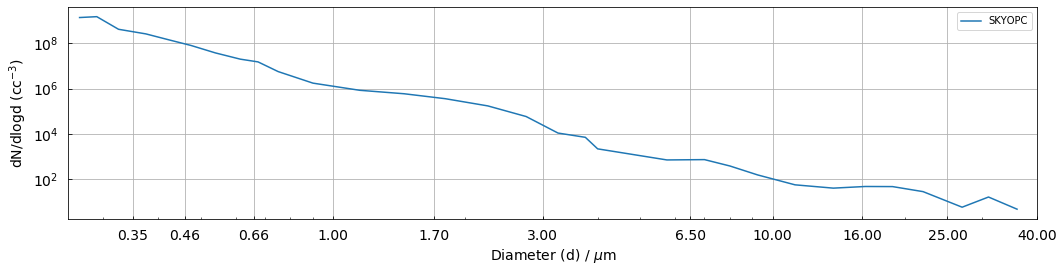

In [37]:

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.grid(True)
ax.loglog(SKYOPC_dist[0],SKYOPC_dist[1],label='SKYOPC')

ax.set_xlim(SKYOPC_bounds[0],SKYOPC_bounds[-1])
ax.set_xticks([0.35, 0.46, 0.66, 1, 1.7, 3,6.5,10, 16, 25, 40])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Diameter (d) / $\mu$m')
ax.set_ylabel('dN/dlogd (cc$^{-3}$)')
ax.legend(loc='best',fontsize=10)
fig.tight_layout()




In [21]:
# Plot time series

def plot_dist_time(d1,d2,dates,counts,bins,name,vmax):
    fig = plt.figure(figsize=(17,10))
    ax = fig.add_subplot(111)
    cs = plt.pcolormesh(dates,np.arange(0,len(bins)-1,1),np.transpose(counts),vmin=0,vmax=vmax)
    cb = plt.colorbar(cs,extend='max',label='Counts/ cc',orientation='horizontal',pad=0.18,aspect=50,shrink=0.7)
    ax.xaxis_date()
    ax.set_title('%s: %s'%(name,(dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))
    ax.set_yticks(np.arange(0,len(bins)-1,1))
    ax.set_yticklabels(bins)
    ax.set_ylabel('Particle Size ($\mu$m)')
    ax.set_xlabel('Hours UTC')
    ax.set_xlim(d1,d2)
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(rule)   
    fig.tight_layout()
    #fig.savefig('/home/fluxtower/Data/OPC_current.png')


In [22]:
sky_counts = SKYOPC_counts.to_numpy()
sky_dates = np.array(SKYOPC_counts.index.to_pydatetime())

plot_dist_time(d1,d2,sky_dates,sky_counts,SKYOPC_bounds,'SKYOPC',1000)

RuntimeError: Locator attempting to generate 1633 ticks from 737207.0 to 737275.0: exceeds Locator.MAXTICKS

Error in callback <function post_execute at 0x114ff1aa0> (for post_execute):


RuntimeError: Locator attempting to generate 1633 ticks from 737207.0 to 737275.0: exceeds Locator.MAXTICKS

RuntimeError: Locator attempting to generate 1633 ticks from 737207.0 to 737275.0: exceeds Locator.MAXTICKS